# Communicating Data Findings - Marketing Analytics 
## by Amani Ezzat

## Preliminary Wrangling

> This data set was provided to students for their final project as part of a MSc in Business Analytics.
> The dataset marketing_data.csv consists of 2,240 customers of XYZ company. Please be informed that columns meanings will be attached for your consideration.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go

#set a grey background
sns.set_style('darkgrid')

%matplotlib inline

> Loading `marketing_data` .

In [2]:
df = pd.read_csv('marketing_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [3]:
#convert columns headers to lower-cased:
df.columns = df.columns.str.lower()

In [4]:
#show columns headers
df.columns.tolist()

['id',
 'year_birth',
 'education',
 'marital_status',
 ' income ',
 'kidhome',
 'teenhome',
 'dt_customer',
 'recency',
 'mntwines',
 'mntfruits',
 'mntmeatproducts',
 'mntfishproducts',
 'mntsweetproducts',
 'mntgoldprods',
 'numdealspurchases',
 'numwebpurchases',
 'numcatalogpurchases',
 'numstorepurchases',
 'numwebvisitsmonth',
 'acceptedcmp3',
 'acceptedcmp4',
 'acceptedcmp5',
 'acceptedcmp1',
 'acceptedcmp2',
 'response',
 'complain',
 'country']

In [5]:
#trim all column headers since `income` has space
df.rename(columns=lambda x: x.strip(), inplace=True)

In [6]:
#structure of the dataframe
df.shape

(2240, 28)

In [7]:
#check if there duplicates
df.duplicated().sum()

0

> The dataset has no duplicates.

In [8]:
#drop unnecessary columns 
df.drop(['id', 'acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5'], axis=1, inplace=True)
df.head()

,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,...,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,response,complain,country
0,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,...,189,218,1,4,4,6,1,1,0,SP
1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,...,0,37,1,7,3,7,5,1,0,CA
2,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,...,2,30,1,3,2,5,2,0,0,US
3,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,...,0,0,1,1,0,2,7,0,0,AUS
4,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,...,0,34,2,3,1,2,7,1,0,SP


In [9]:
#check columns dtypes
df.dtypes

year_birth              int64
education              object
marital_status         object
income                 object
kidhome                 int64
teenhome                int64
dt_customer            object
recency                 int64
mntwines                int64
mntfruits               int64
mntmeatproducts         int64
mntfishproducts         int64
mntsweetproducts        int64
mntgoldprods            int64
numdealspurchases       int64
numwebpurchases         int64
numcatalogpurchases     int64
numstorepurchases       int64
numwebvisitsmonth       int64
response                int64
complain                int64
country                object
dtype: object

In [10]:
#convert dtype of `income` into numeric 
df['income'] = df['income'].apply(lambda x: x.replace('$', '').replace(',', '') if isinstance(x, str) else x).astype(float)

#convert dtype of `dt_customer` into datetime:
df.dt_customer = pd.to_datetime(df.dt_customer)

In [11]:
#make sure of these columns dtypes
df.dtypes

year_birth                      int64
education                      object
marital_status                 object
income                        float64
kidhome                         int64
teenhome                        int64
dt_customer            datetime64[ns]
recency                         int64
mntwines                        int64
mntfruits                       int64
mntmeatproducts                 int64
mntfishproducts                 int64
mntsweetproducts                int64
mntgoldprods                    int64
numdealspurchases               int64
numwebpurchases                 int64
numcatalogpurchases             int64
numstorepurchases               int64
numwebvisitsmonth               int64
response                        int64
complain                        int64
country                        object
dtype: object

In [12]:
#check if there missing values
df.isna().sum()

year_birth              0
education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
dt_customer             0
recency                 0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
response                0
complain                0
country                 0
dtype: int64

> There are 24 missing values in the `income` column.

In [13]:
#fill in the missing values with mean or median
print('Income mean is: {}'.format(df['income'].mean()))
print('Income meadin is: {}'.format(df['income'].median()))

#since the difference bewteen them is not large, we can fill in with the mean
df['income'].fillna(df['income'].mean(), inplace=True)

Income mean is: 52247.25135379061
Income meadin is: 51381.5


In [14]:
#after we fill in the missing values, let's convert dtype of `income` into int
df['income'] = df['income'].astype(np.int64)

In [15]:
#make sure of `income` column dtype
df['income'].dtype

dtype('int64')

In [16]:
#make sure the missing values are filled 
df.isna().sum()

year_birth             0
education              0
marital_status         0
income                 0
kidhome                0
teenhome               0
dt_customer            0
recency                0
mntwines               0
mntfruits              0
mntmeatproducts        0
mntfishproducts        0
mntsweetproducts       0
mntgoldprods           0
numdealspurchases      0
numwebpurchases        0
numcatalogpurchases    0
numstorepurchases      0
numwebvisitsmonth      0
response               0
complain               0
country                0
dtype: int64

In [17]:
#some useful descriptive statistics for numeric columns
df.describe()

,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,response,complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.248661,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


### What is the structure of your dataset?

> The dataset has 2240 observations and 22 attributes. 

### What is/are the main feature(s) of interest in your dataset?

> The `response` of the last campaign the store launched could be considered the main feature as it's an important indicator of how successful the campaign was hence, how profitable is the business.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think `marital_status` `kidhome` `mntfruits` `mntfishproducts` `mntgoldprods` and `recency` will help my investigation.

## Univariate Exploration



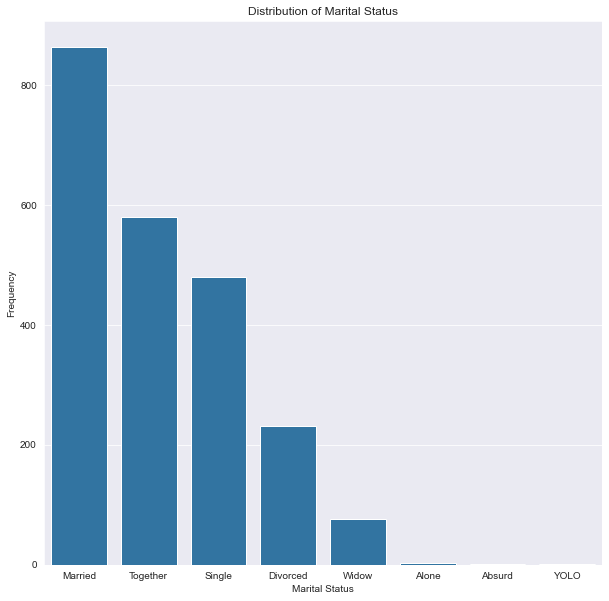

In [18]:
#distribute the frequency of marital_status

plt.figure(figsize=[10,10])


#count the frequency of each unique value in the 'marital_status' column
freq = df['marital_status'].value_counts()

#get the indexes of the series for orders
gen_order = freq.index

base_color = sns.color_palette()[0]
sns.countplot(data=df, x='marital_status', color=base_color, order=gen_order)
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.title('Distribution of Marital Status');

> From the visualization above, we can say that "Married" people are the most frequent ones to the store. But, this visualization doesn't help a lot as it represents the frequency as absolute and this doesn't reflect such an indicator since I don't know what percentage of that out of the whole. So, let's calculate the relative percentages for each unique value of the variable 'marital_status'.

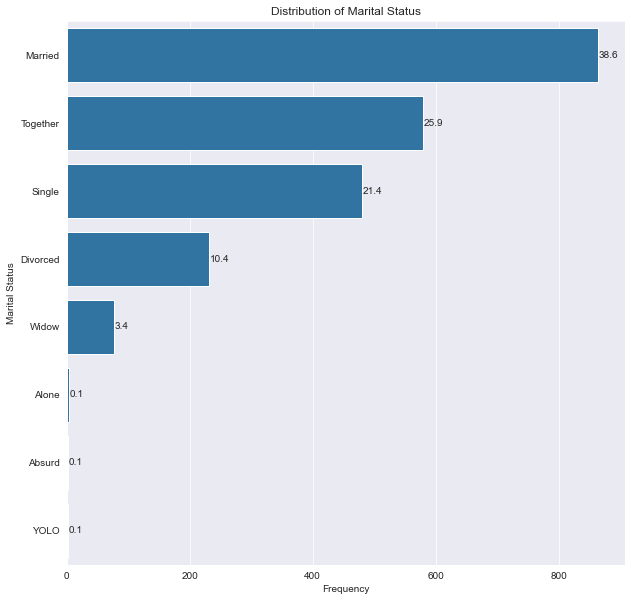

In [19]:
plt.figure(figsize=[10,10])

#count the frequency of unique values in the `marital_status` column
marital_status_counts = df['marital_status'].value_counts()
marital_status_counts

#get the frequency of the unique values of the `marital_status` column in the decreasing order
marital_status = marital_status_counts.index
marital_status

#plot `marital_status` variable 
base_color = sns.color_palette()[0]
sns.countplot(data=df, y='marital_status', color=base_color, order=marital_status)
plt.xlabel('Frequency')
plt.ylabel('Marital Status')
plt.title('Distribution of Marital Status');

#now let's calculate the relative frequency
#sum of all values in `marital_status` column
n_marital_status = df['marital_status'].value_counts().sum()

# Logic to print the proportion text on the bars
for i in range (marital_status_counts.shape[0]):
    count = marital_status_counts[i]
    #convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_marital_status)
    #show the string value on the bar. 
    plt.text(count+1, i, pct_string, va='center')

> Now we can say that almost 40% out of the customers are married and almost 21% are single.

#### Now let's look into another variable which is `kidhome`

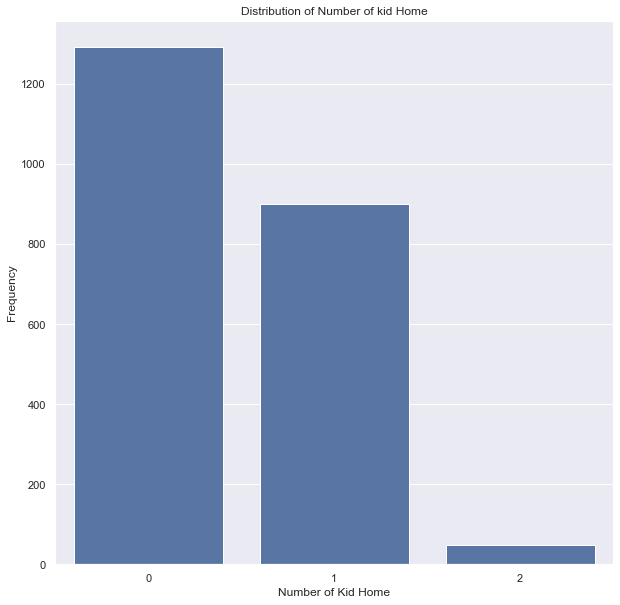

In [20]:
sns.set(rc={'figure.figsize':(10,10)})

#plot the frequency of the customer based of `kidhome` variable
fig = plt.figure()
base_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'kidhome', color = base_color)
plt.xlabel('Number of Kid Home')
plt.ylabel('Frequency')
plt.title('Distribution of Number of kid Home');

> As shown we can say that the most frequent customers are the ones who have no kid in the home and the less frequent ones are those who have 2 kids which most probably they order what they need using the catalog or the website.

#### Let's see another visualization based on the `response` variable in the last campaign the store made it.

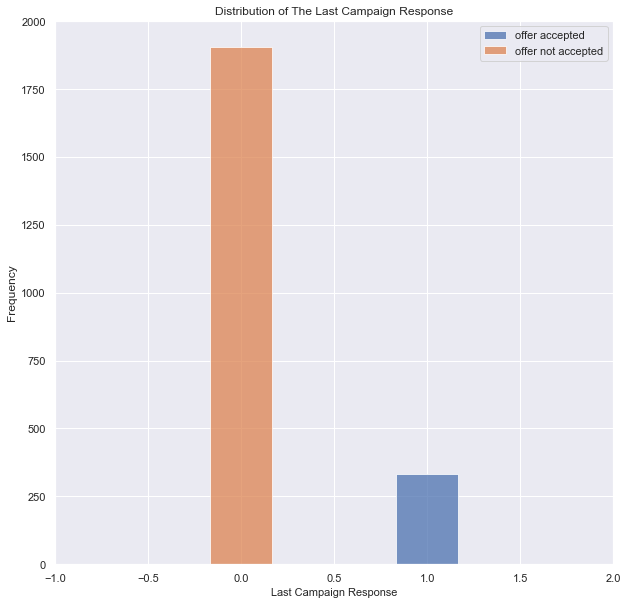

In [21]:
plt.figure(figsize=[10,10])

#create filters of accept_offer and not_accept_offer for the last campaign:
accept_offer = df['response'] == 1
not_accept_offer = df['response'] == 0

# plot response distribution
df.response[accept_offer].hist(alpha=0.75, label='offer accepted', bins=3)
df.response[not_accept_offer].hist(alpha=0.75, label='offer not accepted', bins=3)
plt.title('Distribution of The Last Campaign Response')
plt.xlabel('Last Campaign Response', fontsize=11)
plt.ylabel('Frequency')
plt.xlim((-1,2))
plt.legend();

> As chart can tell, the not accepted offers were away more than the accepted ones. So, I recommend the store to optimize the offers. 


#### Let's see another way to plot to compare the offers accepted to the not accepted ones.

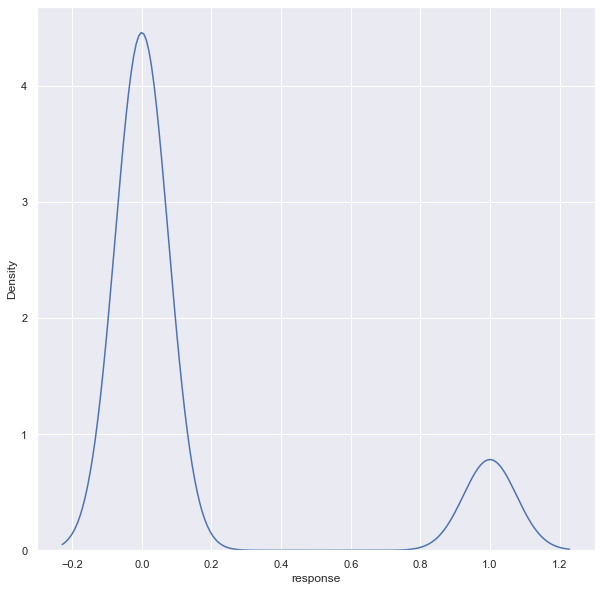

In [22]:
#plot density of `response' of the last campaign
sns.kdeplot(df['response'])
plt.show()

> Since the last campaign was not that successful maybe the reason was the store got not many customers in the campaign days, so let's see the recency distribution.

C:\Users\ameza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


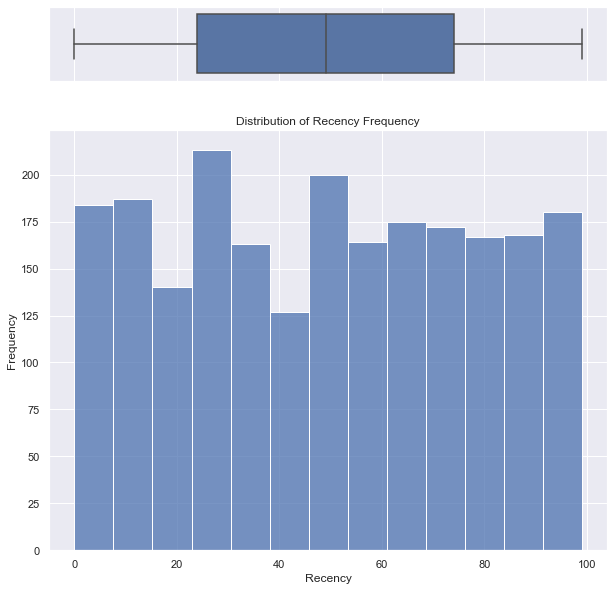

In [23]:
#creating a figure composed of box plot and hist plot
f, (box, hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)})
 
#assigning a graph to each ax
sns.boxplot(df['recency'], ax=box)
sns.histplot(data=df, x='recency', ax=hist)

 
#remove x axis name for the box plot
box.set(xlabel='')

plt.xlabel('Recency', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Recency Frequency')
plt.show();

> That makes sense. The average number of days since the last purchase a customer makes is 50 days which is a huge number, a long time. This can be a start to analyze the reason and make better offers and discounts.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I made sure that the date is prepared well for visualization.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No, I didn't as the data is ready for visualization.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

####  Let's check the relationship between the amount spent on fruits that been bought from the store.

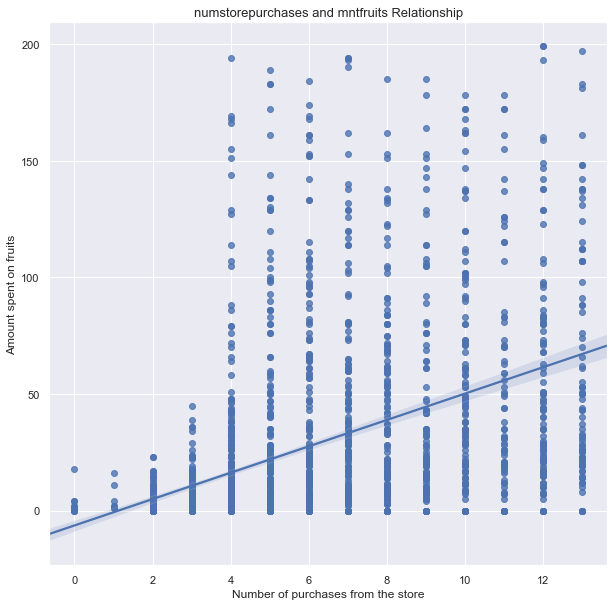

In [24]:
plt.figure(figsize=[10,10])


#plot the relationship between the number of purchases from the store and the amount spent on fruits last 2 years
sns.regplot(data = df, x = 'numstorepurchases', y = 'mntfruits', fit_reg=True, truncate=False)
plt.xlabel('Number of purchases from the store')
plt.ylabel('Amount spent on fruits')
plt.title('numstorepurchases and mntfruits Relationship', fontsize=13);

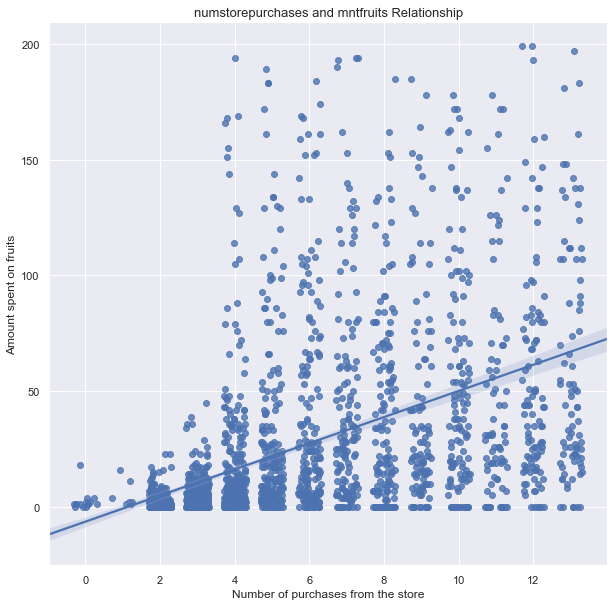

In [25]:
plt.figure(figsize=[10,10])


#let's jitter each x value to be adjusted randomly +/-0.3
sns.regplot(data = df, x = 'numstorepurchases', y = 'mntfruits', fit_reg=True, truncate=False, x_jitter=0.3)
plt.xlabel('Number of purchases from the store')
plt.ylabel('Amount spent on fruits')
plt.title('numstorepurchases and mntfruits Relationship', fontsize=13);

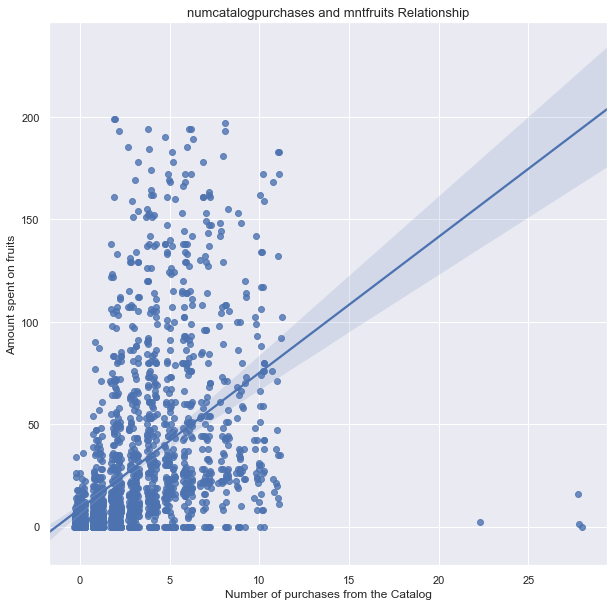

In [26]:
plt.figure(figsize=[10,10])


#let's jitter each x value to be adjusted randomly +/-0.3
sns.regplot(data = df, x = 'numcatalogpurchases', y = 'mntfruits', fit_reg=True, truncate=False, x_jitter=0.3)
plt.xlabel('Number of purchases from the Catalog')
plt.ylabel('Amount spent on fruits')
plt.title('numcatalogpurchases and mntfruits Relationship', fontsize=13);

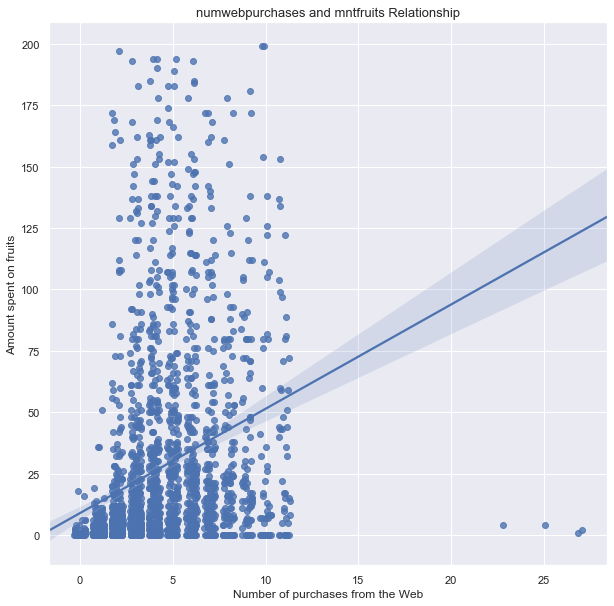

In [27]:
plt.figure(figsize=[10,10])


#let's jitter each x value to be adjusted randomly +/-0.3
sns.regplot(data = df, x = 'numwebpurchases', y = 'mntfruits', fit_reg=True, truncate=False, x_jitter=0.3)
plt.xlabel('Number of purchases from the Web')
plt.ylabel('Amount spent on fruits')
plt.title('numwebpurchases and mntfruits Relationship', fontsize=13);

> As shown above, there is a positive medium relationship between the amount spent on fruits if they are bought from the store.

#### Now, let's check is there a relationship between `kidhome` and `response` of the last campaign the store made.

C:\Users\ameza\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


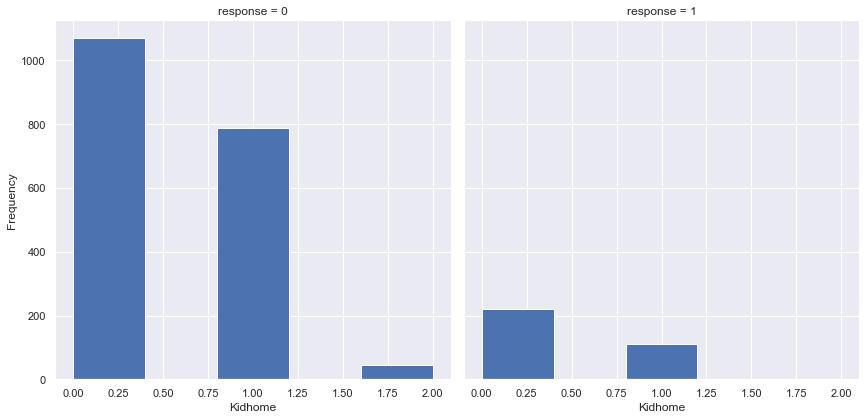

In [28]:
#plot `kidhome` and `response` of the last campaign face by face
g = sns.FacetGrid(df, col='response', size=6)
g.map(plt.hist, 'kidhome', bins=5)
g.set_axis_labels('Kidhome', 'Frequency', fontsize=12);

> There is a negative relationship between those two variables, maybe the campaign was just in the store and was not available for the other channels so the house that has kids had no chance to go to the store, or maybe there was not good advertising for it.

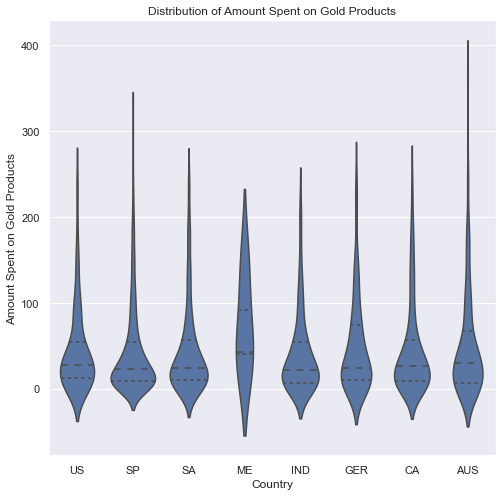

In [29]:
plt.figure(figsize=[8,8])

#order the data by decreasing median
my_order = df.groupby(by=["country"])["mntgoldprods"].mean().iloc[::-1].index
 
#plot the country with my_orderg
sns.violinplot(x='country', y='mntgoldprods', data=df, order=my_order, color=base_color, inner = 'quartile')
plt.title('Distribution of Amount Spent on Gold Products')
plt.xlabel('Country')
plt.ylabel('Amount Spent on Gold Products')
plt.show();

#### Another way to plot `Amount Spent on Gold Products` by `Country`.

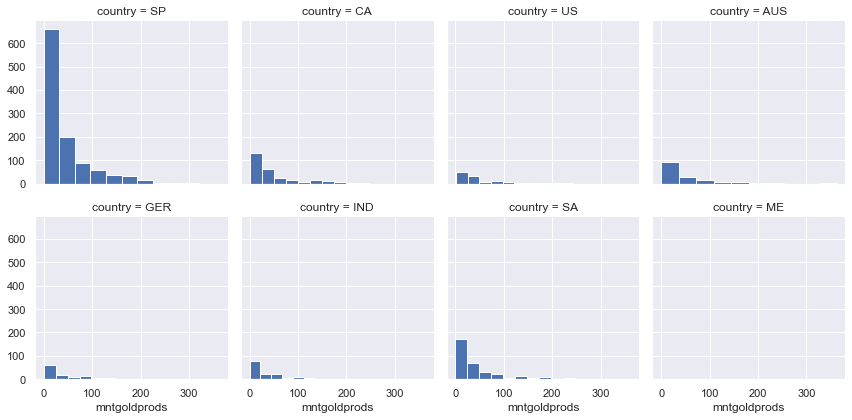

In [30]:
g = sns.FacetGrid(data = df, col = 'country', col_wrap=4, sharey=True)
g.map(plt.hist, 'mntgoldprods');

#### Let's see what is the `country` that best made use of the offers in the last campaign. 

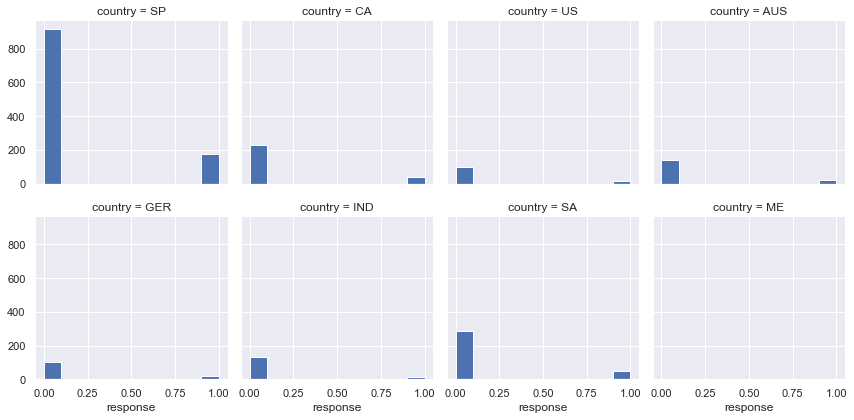

In [31]:
#plot `response` by `country`
g = sns.FacetGrid(data = df, col = 'country', col_wrap=4, sharey=True)
g.map(plt.hist, 'response');

> As the charts tell, SP country is the most country accepted the offers from the last campaign the store launched, also, it has the highest not accepted offers. Since the population of each country doesn't mention and that could be a limitation of the data. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I observed that the highest amount spent on fruits if they are bought from the store and not any other channels. 
> Population of each country has been considered a data limitation so I could not compare the result in terms of the population.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No, I didn't.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

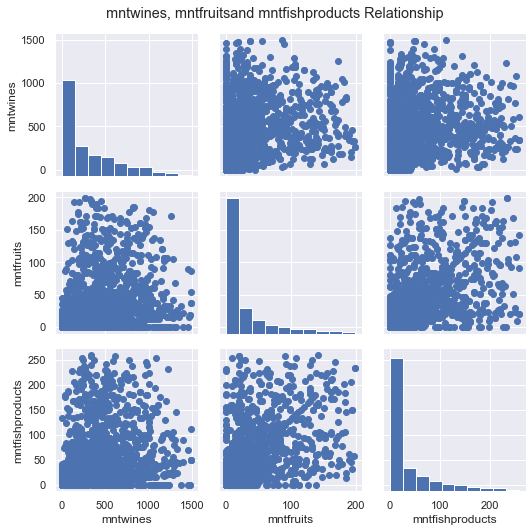

In [50]:
#plot a matrix for some specific variables
g = sns.PairGrid(data = df, vars = ['mntwines', 'mntfruits', 
       'mntfishproducts'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

g.fig.subplots_adjust(top=0.93)
g.fig.suptitle('mntwines, mntfruitsand mntfishproducts Relationship');


> There is a positive relationship between the amount spent on fruits and the amount spent on fish products, so most probably the customer who buys fruits, buys fish products as well. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Yes, this matrix gave me a quick look at the relationship between variables.

### Were there any interesting or surprising interactions between features?

> Yes, it surprises me that the customer who buys twins, buys fruits and fish prooducts as well.